# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

# Load the Dataset

In [2]:
ESR = pd.read_csv('./dataset/clinical/data.csv')

In [3]:
# Split the first column into three new columns
ESR[['second_no', 'version', 'pid']] = ESR.iloc[:, 0].str.split('.', expand=True)

# Extract the numeric parts and replace X and V directly
ESR['second_no'] = ESR['second_no'].str.extract('(\d+)').astype(int)  # Replace X with its numeric part
ESR['version'] = ESR['version'].str.extract('(\d+)').astype(int)  # Replace V with its numeric part
# Convert the 'num' column to integer for sorting
# Fill None values in 'num' with a default value (e.g., 0)
ESR['pid'] = ESR['pid'].fillna(0).astype(int)
# Rename the 'Unnamed: 0' column to 'id'
ESR.rename(columns={'Unnamed: 0': 'id'}, inplace=True)

# Reorder the columns to move num, X, V between id and X1
ESR = ESR[['id', 'pid', 'second_no', 'version', 'X1'] + [col for col in ESR.columns if col not in ['id', 'pid', 'second_no', 'version', 'X1']]]

# Sort the DataFrame by the 'num' column
ESR_sorted = ESR.sort_values(by=['version', 'pid', 'second_no'])

# Display the sorted DataFrame
ESR_sorted.head()


,id,pid,second_no,version,X1,X2,X3,X4,X5,X6,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
9065,X1.V1,0,1,1,12,22,35,45,69,74,...,-18,-32,-47,-53,-48,-40,-17,-23,-32,5
9699,X2.V1,0,2,1,-41,-50,-53,-49,-35,-28,...,34,22,4,-18,-31,-27,-26,-21,-30,5
2988,X3.V1,0,3,1,-45,-60,-73,-70,-70,-51,...,1,-21,-38,-44,-31,-17,4,35,59,5
3227,X4.V1,0,4,1,68,63,52,45,46,45,...,-22,-47,-68,-85,-92,-96,-83,-73,-66,5
8967,X5.V1,0,5,1,-59,-48,-35,-22,4,18,...,4,-5,-16,-29,-35,-21,3,35,66,5


In [4]:
# Find the maximum existing pid
max_pid = ESR['pid'].max()
# Identify unique versions that are not 1
versions_with_empty_pid = ESR[ESR['version'] != 1]['version'].unique()
# Assign a unique pid to each participant and unify the version to 1
for i, version in enumerate(versions_with_empty_pid):
    new_pid = max_pid + i + 1  # Start from max_pid + 1
    ESR.loc[(ESR['version'] == version), 'pid'] = new_pid
    ESR.loc[(ESR['version'] == version), 'version'] = 1

print (f"After data cleaning:")
print (f"There are {len(ESR['pid'].unique())} patients")
print (f"There are {len(ESR['second_no'].unique())} seconds per patient")
print (f"There are {len(ESR['version'].unique())} versions") 
# ESR.to_csv('./dataset/clinical/data_cleaned.csv', index=False)

After data cleaning:
There are 500 patients
There are 23 seconds per patient
There are 1 versions


In [5]:
ESR.head()

,id,pid,second_no,version,X1,X2,X3,X4,X5,X6,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,791,21,1,135,190,229,223,192,125,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,924,15,1,386,382,356,331,320,315,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,1,8,1,-32,-39,-47,-37,-32,-36,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,60,16,1,-105,-101,-96,-92,-89,-95,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,54,20,1,-9,-65,-98,-102,-78,-48,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [16]:
ESR.iloc[:,4:179].values[0]

array([ 135,  190,  229,  223,  192,  125,   55,   -9,  -33,  -38,  -10,
         35,   64,  113,  152,  164,  127,   50,  -47, -121, -138, -125,
       -101,  -50,   11,   39,   24,   48,   64,   46,   13,  -19,  -61,
        -96, -130, -132, -116, -115,  -71,  -14,   25,   19,    6,    9,
         21,   13,  -37,  -58,  -33,    5,   47,   80,  101,   88,   73,
         69,   41,  -13,  -31,  -61,  -80,  -77,  -66,  -43,    5,   87,
        129,  121,   88,   12,  -76, -150, -207, -186, -165, -148, -103,
        -33,   40,   94,   75,    8,  -81, -155, -227, -262, -233, -218,
       -187, -126,  -65,  -12,   27,   61,   49,    9,  -46, -124, -210,
       -281, -265, -181,  -89,   -4,   53,   53,   38,   43,   31,   34,
          9,   -7,  -34,  -70,  -84, -101,  -70,  -11,   42,   62,   66,
         74,   64,   59,   56,   36,  -11,  -30,  -43,  -23,    8,   42,
         77,  103,  135,  121,   79,   59,   43,   54,   90,  111,  107,
         64,   32,   18,  -25,  -69,  -65,  -44,  -

In [17]:
X_aug[0]

array([ 137,  184,  223,  218,  193,  123,   58,  -21,  -30,  -38,   -8,
         37,   58,  120,  155,  161,  137,   49,  -54, -124, -129, -119,
        -99,  -56,    7,   40,   26,   51,   67,   45,   11,  -23,  -57,
        -95, -127, -130, -115, -113,  -72,  -15,   24,   14,    9,   10,
         28,    9,  -40,  -60,  -35,   -3,   53,   76,  111,   91,   78,
         68,   45,  -15,  -29,  -57,  -80,  -83,  -69,  -46,    5,   86,
        117,  117,   88,    0,  -79, -150, -212, -189, -167, -154, -102,
        -30,   43,   96,   73,    7,  -80, -156, -223, -270, -237, -213,
       -192, -123,  -72,  -15,   25,   58,   52,    7,  -48, -120, -203,
       -277, -263, -186,  -90,   -7,   53,   51,   20,   44,   34,   35,
          9,    2,  -32,  -64,  -78, -101,  -68,  -13,   48,   66,   67,
         91,   57,   62,   60,   40,   -7,  -36,  -40,  -15,    9,   38,
         80,  104,  140,  123,   81,   59,   47,   51,   85,  116,  108,
         61,   32,   12,  -33,  -70,  -64,  -40,  -

/var/folders/jq/xzxylcjd0jgg602myzd5mbww0000gn/T/ipykernel_15833/2679232761.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tgt[tgt>1]=0


The number of trials for the non-seizure class is: 9200
The number of trials for the seizure class is: 2300


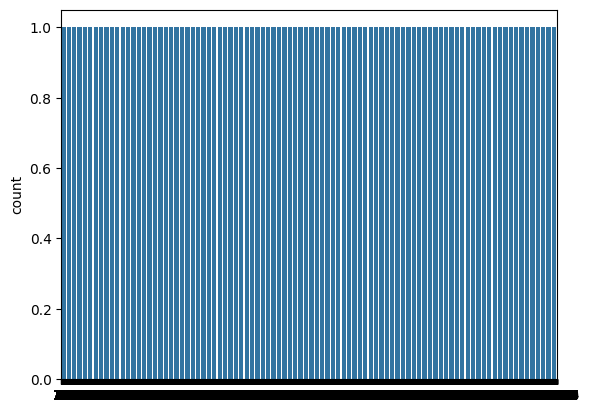

In [6]:
cols = ESR.columns
tgt = ESR.y
tgt[tgt>1]=0
ax = sn.countplot(tgt,label="Count")
non_seizure, seizure = tgt.value_counts()
print('The number of trials for the non-seizure class is:', non_seizure)
print('The number of trials for the seizure class is:', seizure)

As we can see, there are 178 EEG features and 5 possible classes. The main goal of the dataset it's to be able to correctly identify epileptic seizures from EEG data, so a binary classification between classes of label 1 and the rest (2,3,4,5). In order to train our model, let's define our independent variables (X) and our dependent variable (y).

## &#128223; 1. Checking Missing Data

In [6]:
ESR.isnull().sum()

id           0
pid          0
second_no    0
version      0
X1           0
            ..
X175         0
X176         0
X177         0
X178         0
y            0
Length: 183, dtype: int64

# &#128203; Exploratory Data Analysis

In [7]:
ESR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 183 entries, id to y
dtypes: int64(182), object(1)
memory usage: 16.1+ MB


In [8]:
ESR.describe()

,pid,second_no,version,X1,X2,X3,X4,X5,X6,X7,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,441.144000,12.000000,1.092000,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,3.000000
std,307.141554,6.633538,1.029382,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,1.414275
min,0.000000,1.000000,1.000000,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,1.000000
25%,141.750000,6.000000,1.000000,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,2.000000
50%,422.500000,12.000000,1.000000,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,3.000000
75%,712.250000,18.000000,1.000000,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,4.000000
max,994.000000,23.000000,14.000000,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,5.000000


In [9]:
ESR.iloc[:,4:179] 

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175
0,135,190,229,223,192,125,55,-9,-33,-38,...,-63,-11,10,8,-17,-15,-31,-77,-103,-127
1,386,382,356,331,320,315,307,272,244,232,...,105,131,163,168,164,150,146,152,157,156
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,-48,-42,-6,29,57,64,48,19,-12,-30
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,14,15,11,10,4,2,-12,-32,-41,-65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,...,26,24,24,20,15,16,12,5,-1,-18
11496,-47,-11,28,77,141,211,246,240,193,136,...,-201,-162,-126,-94,-65,-33,-7,14,27,48
11497,14,6,-13,-16,10,26,27,-9,4,14,...,-68,-57,-78,-42,-65,-48,-61,-62,-67,-30
11498,-40,-25,-9,-12,-2,12,7,19,22,29,...,87,97,105,114,121,135,148,143,116,86


In [19]:
X = ESR.iloc[:,4:179].values
X.shape

(11500, 175)

In [20]:
X

array([[ 135,  190,  229, ...,  -77, -103, -127],
       [ 386,  382,  356, ...,  152,  157,  156],
       [ -32,  -39,  -47, ...,   19,  -12,  -30],
       ...,
       [  14,    6,  -13, ...,  -62,  -67,  -30],
       [ -40,  -25,   -9, ...,  143,  116,   86],
       [  29,   41,   57, ...,    2,    5,    4]])

In [21]:
X[1,:].shape

(175,)

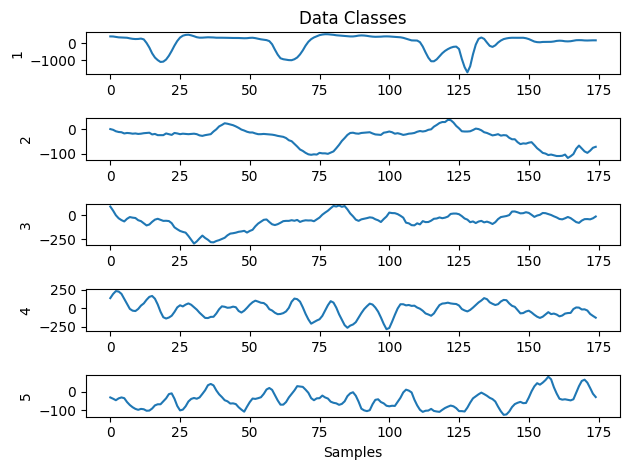

In [22]:
plt.subplot(511)
plt.plot(X[1,:])
plt.title('Data Classes')
plt.ylabel('1')

plt.subplot(512)
plt.plot(X[7,:])
plt.ylabel('2')  # Label for the Y-axis

plt.subplot(513)
plt.plot(X[12,:])
plt.ylabel('3')  # Label for the Y-axis

plt.subplot(514)
plt.plot(X[0,:])
plt.ylabel('4')  # Label for the Y-axis

plt.subplot(515)
plt.plot(X[2,:])
plt.xlabel('Samples')  # Label for the X-axis
plt.ylabel('5')  # Label for the Y-axis

plt.tight_layout()  # Adjusts the layout so labels don't overlap
plt.show()

In [24]:
ESR

,id,pid,second_no,version,X1,X2,X3,X4,X5,X6,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,791,21,1,135,190,229,223,192,125,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,924,15,1,386,382,356,331,320,315,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,1,8,1,-32,-39,-47,-37,-32,-36,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,60,16,1,-105,-101,-96,-92,-89,-95,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,54,20,1,-9,-65,-98,-102,-78,-48,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,X22.V1.114,114,22,1,-22,-22,-23,-26,-36,-42,...,15,16,12,5,-1,-18,-37,-47,-48,2
11496,X19.V1.354,354,19,1,-47,-11,28,77,141,211,...,-65,-33,-7,14,27,48,77,117,170,1
11497,X8.V1.28,28,8,1,14,6,-13,-16,10,26,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11498,X10.V1.932,932,10,1,-40,-25,-9,-12,-2,12,...,121,135,148,143,116,86,68,59,55,3


In [26]:
y = ESR.iloc[:,179+3].values
y

array([4, 1, 5, ..., 5, 3, 4])

To make this a binary problem, let's turn the non-seizure classes 0 while maintaining the seizure as 1.

In [27]:
y[y>1]=0
y

array([0, 1, 0, ..., 0, 0, 0])

# Building Machine Learning Models

##  Splitting the Dataset into the Training set and Test set


In [14]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Feature Scaling

In [ ]:
import tsaug
from tsaug.visualization import plot

# Define a chain of augmenters using tsaug
augmenter =  (
    tsaug.AddNoise(scale=0.15)          # Add noise to the data
    + tsaug.TimeWarp(n_speed_change=2) # Warp the time-series data to simulate time distortions
    + tsaug.Drift(max_drift=(0.1, 0.5))# Add drift to simulate gradual shifts over time
    + tsaug.Crop(size=0.9)             # Crop the time-series to 90% of its original length
)


# Add Noise
X_aug = tsaug.AddNoise(scale=0.01).augment(ESR.iloc[:,4:179].values)

plot(ESR.iloc[:,4:179].values[0]);
plot(X_aug[0]);


In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 1. Logistic Regression


In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score

def evaluate_classification_metrics(y_true, y_pred, y_pred_prob):
    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)
    
    # Calculate precision
    precision = precision_score(y_true, y_pred)
    
    # Calculate recall
    recall = recall_score(y_true, y_pred)
    
    # Calculate F1 score
    f1 = f1_score(y_true, y_pred)
    
    # Calculate ROC-AUC score
    roc_auc = roc_auc_score(y_true, y_pred_prob)
    
    # Calculate Cohen's Kappa
    kappa = cohen_kappa_score(y_true, y_pred)
    
    # Print metrics
    print(f'Accuracy: {accuracy * 100:.2f} %')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')
    print(f'ROC-AUC: {roc_auc:.2f}')
    print(f'Cohen\'s Kappa: {kappa:.2f}')
    
    # Return metrics as a dictionary
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'kappa': kappa
    }

In [17]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(max_iter=200)
model_lr.fit(X_train, y_train)
y_pred_log_reg = model_lr.predict(X_test)
# acc_log_reg = round(clf.score(X_train, y_train) * 100, 2)
y_pred_prob = model_lr.predict_proba(X_test)[:, 1]  # Probability estimates for ROC-AUC
metrics_lr = evaluate_classification_metrics(y_test, y_pred_log_reg, y_pred_prob)

Accuracy: 81.52 %
Precision: 0.95
Recall: 0.12
F1 Score: 0.21
ROC-AUC: 0.55
Cohen's Kappa: 0.17


Observations:
1. The ROC-AUC score of 0.55 is very close to 0.5, which suggests that the model’s ability to distinguish between the positive and negative classes is almost random.
2. A recall of 0.08 means that the model identifies only 8% of the actual positive cases. This suggests that the model is missing many actual positives (high false negatives).

Concusions:

Check for class imbalance

In [18]:
y_train_series = pd.Series(y_train)
y_train_series.value_counts(normalize=True) * 100

0    80.184783
1    19.815217
dtype: float64

Approximately 80% of data is from non-seizure class. Let's try to balance the data

In [19]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [20]:
from sklearn.linear_model import LogisticRegression
model_lr_bal = LogisticRegression(max_iter=200)
model_lr_bal.fit(X_train_balanced, y_train_balanced)
y_pred_log_reg = model_lr_bal.predict(X_test)
# acc_log_reg = round(clf.score(X_train, y_train) * 100, 2)
y_pred_prob = model_lr_bal.predict_proba(X_test)[:, 1]  # Probability estimates for ROC-AUC
metrics_lr_bal = evaluate_classification_metrics(y_test, y_pred_log_reg, y_pred_prob)

Accuracy: 67.30 %
Precision: 0.31
Recall: 0.49
F1 Score: 0.38
ROC-AUC: 0.55
Cohen's Kappa: 0.17


/Users/naman/anaconda3/envs/accenture/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression is still underperforming. Let's try few more models

# 2.Support Vector Machine (SVM)


In [21]:
from sklearn.svm import SVC
model_svc = SVC()
model_svc.fit(X_train, y_train)
y_pred_svc = model_svc.predict(X_test)
y_pred_prob = model_svc.decision_function(X_test) 
metrics_svc = evaluate_classification_metrics(y_test, y_pred_svc, y_pred_prob)

Accuracy: 97.09 %
Precision: 0.96
Recall: 0.90
F1 Score: 0.93
ROC-AUC: 1.00
Cohen's Kappa: 0.91


This shows significant improvement in performance

In [22]:

# Train SVC with balanced data
model_svc_bal = SVC()
model_svc_bal.fit(X_train_balanced, y_train_balanced)

# Make predictions on original test set
y_pred_svc = model_svc_bal.predict(X_test)
y_pred_prob = model_svc_bal.decision_function(X_test)

# Evaluate metrics
metrics_svc_bal = evaluate_classification_metrics(y_test, y_pred_svc, y_pred_prob)

Accuracy: 97.61 %
Precision: 0.92
Recall: 0.97
F1 Score: 0.94
ROC-AUC: 1.00
Cohen's Kappa: 0.93


# Linear SVM

In [23]:
from sklearn.svm import SVC, LinearSVC
model_lsvc = LinearSVC()
model_lsvc.fit(X_train, y_train)
y_pred_linear_svc = model_lsvc.predict(X_test)
y_pred_prob = model_lsvc.decision_function(X_test)
metrics_l_svc = evaluate_classification_metrics(y_test, y_pred_linear_svc, y_pred_prob)

Accuracy: 81.13 %
Precision: 0.92
Recall: 0.10
F1 Score: 0.18
ROC-AUC: 0.55
Cohen's Kappa: 0.14


In [24]:
from sklearn.svm import SVC, LinearSVC
model_l_svc_bal = LinearSVC()
model_l_svc_bal.fit(X_train_balanced, y_train_balanced)
y_pred_linear_svc = model_l_svc_bal.predict(X_test)
y_pred_prob = model_l_svc_bal.decision_function(X_test)
metrics_l_svc_bal = evaluate_classification_metrics(y_test, y_pred_linear_svc, y_pred_prob)

Accuracy: 67.61 %
Precision: 0.31
Recall: 0.47
F1 Score: 0.37
ROC-AUC: 0.54
Cohen's Kappa: 0.17


# 3.*k*-Nearest Neighbors


In [25]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)
y_pred_prob = model_knn.predict_proba(X_test)[:, 1]
metrics_knn = evaluate_classification_metrics(y_test, y_pred_knn, y_pred_prob)

Accuracy: 91.70 %
Precision: 0.99
Recall: 0.61
F1 Score: 0.75
ROC-AUC: 0.92
Cohen's Kappa: 0.71


In [26]:
from sklearn.neighbors import KNeighborsClassifier
model_knn_bal = KNeighborsClassifier()
model_knn_bal.fit(X_train_balanced, y_train_balanced)
y_pred_knn = model_knn_bal.predict(X_test)
y_pred_prob = model_knn_bal.predict_proba(X_test)[:, 1]
metrics_knn_bal = evaluate_classification_metrics(y_test, y_pred_knn, y_pred_prob)

Accuracy: 96.30 %
Precision: 0.97
Recall: 0.85
F1 Score: 0.90
ROC-AUC: 0.95
Cohen's Kappa: 0.88


# 4. Gaussian Naive Bayes


In [27]:
from sklearn.naive_bayes import GaussianNB
model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)
y_pred_gnb = model_gnb.predict(X_test)
y_pred_prob = model_gnb.predict_proba(X_test)[:, 1]
metrics_gnb = evaluate_classification_metrics(y_test, y_pred_gnb, y_pred_prob)

Accuracy: 95.70 %
Precision: 0.89
Recall: 0.90
F1 Score: 0.90
ROC-AUC: 0.99
Cohen's Kappa: 0.87


In [28]:
from sklearn.naive_bayes import GaussianNB
model_gnb_bal = GaussianNB()
model_gnb_bal.fit(X_train_balanced, y_train_balanced)
y_pred_gnb = model_gnb_bal.predict(X_test)
y_pred_prob = model_gnb_bal.predict_proba(X_test)[:, 1]
metrics_gnb_bal = evaluate_classification_metrics(y_test, y_pred_gnb, y_pred_prob)

Accuracy: 95.91 %
Precision: 0.88
Recall: 0.92
F1 Score: 0.90
ROC-AUC: 0.98
Cohen's Kappa: 0.88


# 5. Artificial Neural Networks(ANN)


In [29]:
#Importing keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

### Initializing the ANN

In [30]:
model_ann = Sequential()
model_ann.add(Dense(units=80, kernel_initializer='uniform', activation='relu', input_dim=178))
model_ann.add(Dense(units=80, kernel_initializer='uniform', activation='relu',))
model_ann.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
model_ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
#Fitting the ANN to the training set
model_ann.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100


/Users/naman/anaconda3/envs/accenture/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


920/920 ━━━━━━━━━━━━━━━━━━━━ 1s 351us/step - accuracy: 0.9192 - loss: 0.3268
Epoch 2/100
920/920 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - accuracy: 0.9724 - loss: 0.0940
Epoch 3/100
920/920 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - accuracy: 0.9766 - loss: 0.0742
Epoch 4/100
920/920 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - accuracy: 0.9779 - loss: 0.0701
Epoch 5/100
920/920 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step - accuracy: 0.9813 - loss: 0.0602
Epoch 6/100
920/920 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - accuracy: 0.9844 - loss: 0.0499
Epoch 7/100
920/920 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - accuracy: 0.9852 - loss: 0.0417
Epoch 8/100
920/920 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - accuracy: 0.9865 - loss: 0.0376
Epoch 9/100
920/920 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - accuracy: 0.9856 - loss: 0.0393
Epoch 10/100
920/920 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.9888 - loss: 0.0313
Epoch 11/100
920/920 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step - accuracy: 0.9890 - loss: 0.0317
Epoch 12/100
920/920 ━━━━━━━━━━

In [31]:
# Predicting the Test set results
y_pred_probs = model_ann.predict(X_test)
y_pred = (y_pred_probs > 0.5)
metrics_ann = evaluate_classification_metrics(y_test, y_pred, y_pred_probs)

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step
Accuracy: 97.48 %
Precision: 0.96
Recall: 0.92
F1 Score: 0.94
ROC-AUC: 0.99
Cohen's Kappa: 0.92


In [32]:
model_ann_bal = Sequential()
model_ann_bal.add(Dense(units=80, kernel_initializer='uniform', activation='relu', input_dim=178))
model_ann_bal.add(Dense(units=80, kernel_initializer='uniform', activation='relu',))
model_ann_bal.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
model_ann_bal.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
#Fitting the ANN to the training set
model_ann_bal.fit(X_train_balanced, y_train_balanced, batch_size = 10, epochs = 100)

Epoch 1/100


/Users/naman/anaconda3/envs/accenture/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1476/1476 ━━━━━━━━━━━━━━━━━━━━ 1s 532us/step - accuracy: 0.8510 - loss: 0.2967
Epoch 2/100
1476/1476 ━━━━━━━━━━━━━━━━━━━━ 1s 384us/step - accuracy: 0.9673 - loss: 0.1050
Epoch 3/100
1476/1476 ━━━━━━━━━━━━━━━━━━━━ 1s 380us/step - accuracy: 0.9720 - loss: 0.0816
Epoch 4/100
1476/1476 ━━━━━━━━━━━━━━━━━━━━ 1s 373us/step - accuracy: 0.9740 - loss: 0.0717
Epoch 5/100
1476/1476 ━━━━━━━━━━━━━━━━━━━━ 1s 379us/step - accuracy: 0.9810 - loss: 0.0564
Epoch 6/100
1476/1476 ━━━━━━━━━━━━━━━━━━━━ 1s 370us/step - accuracy: 0.9829 - loss: 0.0463
Epoch 7/100
1476/1476 ━━━━━━━━━━━━━━━━━━━━ 1s 373us/step - accuracy: 0.9860 - loss: 0.0416
Epoch 8/100
1476/1476 ━━━━━━━━━━━━━━━━━━━━ 1s 452us/step - accuracy: 0.9893 - loss: 0.0320
Epoch 9/100
1476/1476 ━━━━━━━━━━━━━━━━━━━━ 1s 431us/step - accuracy: 0.9893 - loss: 0.0285
Epoch 10/100
1476/1476 ━━━━━━━━━━━━━━━━━━━━ 1s 409us/step - accuracy: 0.9900 - loss: 0.0263
Epoch 11/100
1476/1476 ━━━━━━━━━━━━━━━━━━━━ 1s 438us/step - accuracy: 0.9913 - loss: 0.0217
Epoch 12/

In [33]:
# Predicting the Test set results
y_pred_probs = model_ann_bal.predict(X_test)
y_pred = (y_pred_probs > 0.5)
metrics_ann_bal = evaluate_classification_metrics(y_test, y_pred, y_pred_probs)

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step
Accuracy: 97.57 %
Precision: 0.95
Recall: 0.94
F1 Score: 0.94
ROC-AUC: 0.99
Cohen's Kappa: 0.93


# Principal Component Analysis (PCA)


In [34]:
from sklearn.decomposition import PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
acc_PCA = round(pca.score(X_train, y_train) )
print (str(acc_PCA) + '%')

92%


# Comparing Models

In [35]:
metrics_data = {
    'Logistic Regression': metrics_lr,
    'SVC': metrics_svc,
    'KNN': metrics_knn,
    'Naive Bayes': metrics_gnb,
    'Linear SVC': metrics_l_svc,
    'ANN': metrics_ann,
}

df_metrics = pd.DataFrame(metrics_data)
df_metrics.T.sort_values(by='roc_auc', ascending=False)

,accuracy,precision,recall,f1_score,roc_auc,kappa
SVC,0.970870,0.955556,0.901468,0.927724,0.996306,0.909502
ANN,0.974783,0.956427,0.920335,0.938034,0.991352,0.922212
Naive Bayes,0.956957,0.893750,0.899371,0.896552,0.985411,0.869377
KNN,0.916957,0.989726,0.605870,0.751625,0.917671,0.705194
Linear SVC,0.811304,0.921569,0.098532,0.178030,0.549334,0.143724
Logistic Regression,0.815217,0.948276,0.115304,0.205607,0.545978,0.168204


In [36]:
metrics_data = {
    'Logistic Regression': metrics_lr_bal,
    'SVC': metrics_svc_bal,
    'KNN': metrics_knn_bal,
    'Naive Bayes': metrics_gnb_bal,
    'Linear SVC': metrics_l_svc_bal,
    'ANN': metrics_ann_bal,
}

df_metrics = pd.DataFrame(metrics_data)
df_metrics.T.sort_values(by='roc_auc', ascending=False)


,accuracy,precision,recall,f1_score,roc_auc,kappa
SVC,0.976087,0.918651,0.970650,0.943935,0.995561,0.928752
ANN,0.975652,0.945032,0.937107,0.941053,0.992237,0.925711
Naive Bayes,0.959130,0.883768,0.924528,0.903689,0.982710,0.877767
KNN,0.963043,0.971154,0.846960,0.904815,0.950464,0.882018
Logistic Regression,0.673043,0.314440,0.488470,0.382594,0.550807,0.174213
Linear SVC,0.676087,0.311798,0.465409,0.373423,0.544985,0.166363


In [46]:
from scipy import stats
from scipy.special import expit  # For sigmoid conversion

# Assuming model1, model2, model3 are your trained models for classification
pred1 = model_svc_bal.predict(X_test)
pred2 = model_gnb_bal.predict(X_test)
probs3 = model_ann.predict(X_test)
probs1 = expit(model_svc_bal.decision_function(X_test))  # Converts to probability
probs2 = model_gnb_bal.predict_proba(X_test)[:, 1]

# Average the predicted probabilities for each instance
final_probs = (probs1 + probs2 + probs3) / 3

pred3 = (probs3 > 0.5).astype(int)  # Ensure it's the same format as pred1 and pred2
pred3 = pred3.reshape(-1)

print(pred1.shape)
print(pred2.shape)
print(pred3.shape)
# Majority voting ensemble
final_predictions = stats.mode(np.stack([pred1, pred2, pred3]), axis=0)[0].flatten()
metrics = evaluate_classification_metrics(y_test, final_predictions, final_probs)

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 279us/step
(2300,)
(2300,)
(2300,)
Accuracy: 97.65 %
Precision: 0.93
Recall: 0.96
F1 Score: 0.94
Cohen's Kappa: 0.93


In [47]:
metrics

{'accuracy': 0.9765217391304348,
 'precision': 0.9272727272727272,
 'recall': 0.9622641509433962,
 'f1_score': 0.9444444444444444,
 'kappa': 0.9295666819782575}

# Conclusion
The aim of this study is to detect epileptic seizure using two different feature ex-traction methods and comparison performance of various machine learning algorithms.

# References
1. [Epileptic Seizure Recognition Research Paper](http://iwbbio.ugr.es/2014/papers/IWBBIO_2014_paper_1.pdf)

2. [Epileptics Seziure Recognition Github's HelpNotebook](https://github.com/erayon/seizures/blob/master/seizures_.ipynb)

3. [Epileptic Seizure Recognition Video](https://www.youtube.com/watch?v=sq0AhHtknBU)